<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-05-16 18:06:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-05-16 18:06:24 (307 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [10]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [11]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [12]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

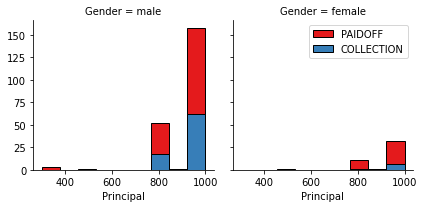

In [13]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

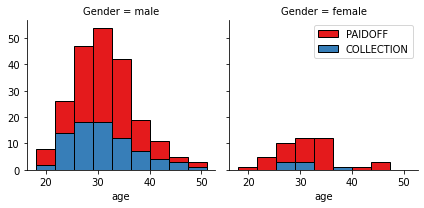

In [14]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

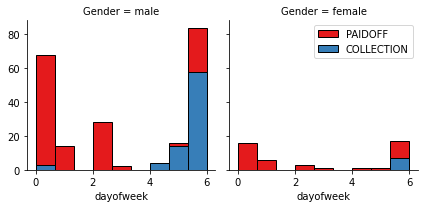

In [15]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [16]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males do


Lets convert male to 0 and female to 1:


In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [20]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [70]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Let's define feature sets, X:

In [71]:
X = Feature  
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [105]:
X = np.asarray(Feature)  #we need to convert it to arrays for sklearn algorithms
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]])

What are our labels?

In [107]:
df['loan_status']=df['loan_status'].astype('int')
y=np.asarray(df['loan_status'].values)          #same here
y[0:5]

unique, counts = np.unique(y, return_counts=True) #checking the number of Paidoffs/Colections is consistent
dict(zip(unique, counts))

{0: 260, 1: 86}

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [108]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [109]:
#first we split the dataset into train and test:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [110]:
#we can now launch the training, I'm going to use a range of different k to optimize this parameter:
train_metrics=[]
test_metrics=[]
ks=[]
for k in range (2,35):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yknn  = neigh.predict(X_test)                                     # making here the predictions to get the output errors all at once as a function of k
    train_acc=metrics.accuracy_score(y_train, neigh.predict(X_train))
    test_acc=metrics.accuracy_score(y_test, yknn)                     #we compare the prediction with the actual y_test labels
    ks.append(k)
    train_metrics.append(train_acc)
    test_metrics.append(test_acc)


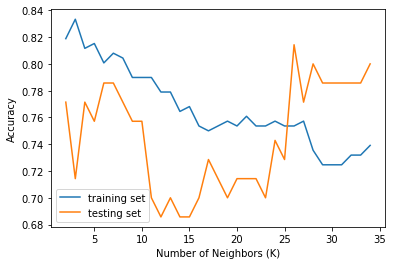

In [111]:
#and plot the resulting accuracies against number of neighbours
import matplotlib.pyplot as plt
plt.plot(ks, train_metrics, label='training set')
plt.plot(ks, test_metrics, label='testing set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.legend()
plt.show()

### k=6, 7 and 26 seem pretty fair results with similar and good train and test accuracies, I choose k=6 as 26 groups is way too much for this small dataset.

# Decision Tree

In [168]:
#now we have the datasets split and we only need to launch the training and test the accuracy of the model:
from sklearn.tree import DecisionTreeClassifier

LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5) #for some reason, even values yield only zeroes in the prediction array
LoanTree.fit(X_train,y_train)
TreeHat = LoanTree.predict(X_test)

print (y_train [0:20])
print (LoanTree.predict(X_train)[0:20])

print (y_test [0:30]) 
print (TreeHat [0:30])   #the guessing does not appear to be very straightforward at y_test :/

[0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0]
[0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0]


# Support Vector Machine

In [113]:
#again, I'll test the different kernelling methods to check the best one
from sklearn import svm

rbf = svm.SVC(kernel='rbf')
lin = svm.SVC(kernel='linear')
poly= svm.SVC(kernel='poly')
sigm= svm.SVC(kernel='sigmoid')

rbf.fit(X_train, y_train)
y_rbf = rbf.predict(X_test)

lin.fit(X_train, y_train)
y_lin = lin.predict(X_test)  #this algorithm generates only zeroes

poly.fit(X_train, y_train) 
y_poly =poly.predict(X_test)

sigm.fit(X_train, y_train) 
y_sigm = sigm.predict(X_test)

print(y_rbf [0:32])
print(y_test [0:32])

[1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Using rbf algorithm: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        55
           1       0.36      0.27      0.31        15

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Using linear algorithm: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Using polynomial algorithm: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        55
           1       0.33      0.07      0.11        15

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49      

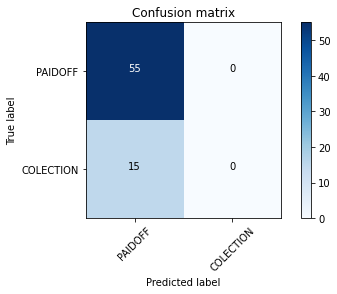

In [104]:
cnf_matrix = confusion_matrix(y_test, y_lin, labels=[0,1])
np.set_printoptions(precision=2)

print ("Using rbf algorithm: \n", classification_report(y_test, y_rbf))
print ("Using linear algorithm: \n", classification_report(y_test, y_lin)) #for any reason, linear algorithm does not predict any client as COLLECTION (1)
print ("Using polynomial algorithm: \n", classification_report(y_test, y_poly)) #this algorithm has a 77% accuracy, still predicting some "1"s, so I choose it
print ("Using sigmoid algorithm: \n", classification_report(y_test, y_sigm))

# Plotting non-normalized confusion matrix for linear algorithm
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix for linear algorithm')


# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

ns=[]
Jaccard=[]
Logloss=[]
for n in range (-4, 1):   #I repeat the loop I used for KNN optimization, this time using different levels of regularization
    LR = LogisticRegression(C=10**n, solver='liblinear').fit(X_train,y_train)
    y_LR = LR.predict(X_test)
    y_LR_prob = LR.predict_proba(X_test)
    JSC=jaccard_score(y_test, y_LR,pos_label=0)
    LL =log_loss(y_test, y_LR_prob)
    ns.append(n)
    Jaccard.append(JSC)
    Logloss.append(LL)
    

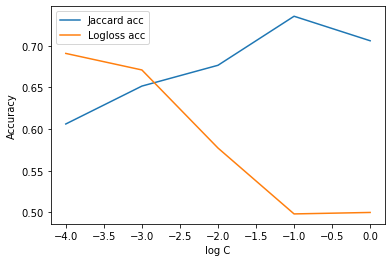

In [119]:
plt.plot(ns, Jaccard, label='Jaccard acc')
plt.plot(ns, Logloss, label='Logloss acc')
plt.ylabel('Accuracy')
plt.xlabel('log C')
plt.legend()
plt.show()


##The optimum seems to be at C=0.001

# Model Evaluation using Test set

In [120]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [121]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-05-16 22:19:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-05-16 22:19:50 (41.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [149]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
#test_df['loan_status'].values

#I have to preprocess the DataFrame in the same way I did before with the train dataset:
#labels:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
y=np.asarray(test_df['loan_status'].values)          #same here
print(y[0:5])

#unique, counts = np.unique(y, return_counts=True) nt
#dict(zip(unique, counts))

#independent variables:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
features = test_df[['Principal','terms','age','Gender','weekend']]
test_df = pd.concat([features,pd.get_dummies(test_df['education'])], axis=1)
test_df.drop(['Master or Above'], axis = 1,inplace=True)
#test_df.head()

x=np.asarray(test_df)
x=preprocessing.StandardScaler().fit(x).transform(x)
print(x[0:5])

[0 0 0 0 0]
[[ 0.49  0.93  3.06  1.98 -4.12  2.4  -0.8  -0.86]
 [-3.56 -1.7   0.53 -0.51 -4.12 -0.42 -0.8  -0.86]
 [ 0.49  0.93  1.88  1.98 -4.12 -0.42  1.25 -0.86]
 [ 0.49  0.93 -0.98 -0.51  0.24 -0.42 -0.8   1.16]
 [-0.67 -0.79 -0.48 -0.51  0.24  2.4  -0.8  -0.86]]


In [163]:
#KNN (I have to re-train the KNN classifier with only k=6):
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
y_6nn = neigh.predict(x)
print(y_6nn)
print(y)
Jacc_6nn= jaccard_score   (y, y_6nn, pos_label=0)
f1_6nn  = metrics.f1_score(y, y_6nn, pos_label=0)
print("Jaccard score is: ", Jacc_6nn)
print("F1 score is: ", f1_6nn)

[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Jaccard score is:  0.6981132075471698
F1 score is:  0.8222222222222222


In [169]:
#Decision Tree (I use depth=5 as I found it the most accurate with train_dataset)
y_tree = LoanTree.predict(x)

Jacc_tree= jaccard_score   (y, y_tree, pos_label=0)
f1_tree  = metrics.f1_score(y, y_tree, pos_label=0)
print("Jaccard score is: ", Jacc_tree)
print("F1 score is: ", f1_tree)


Jaccard score is:  0.3953488372093023
F1 score is:  0.5666666666666667


In [167]:
#Support Vector Machine (Now I will be using the polynomial solver as it seems the most accurate):
y_svm =poly.predict(x)
Jacc_svm= jaccard_score   (y, y_svm, pos_label=0)
f1_svm  = metrics.f1_score(y, y_svm, pos_label=0)
print("Jaccard score is: ", Jacc_svm)
print("F1 score is: ", f1_svm)

Jaccard score is:  0.75
F1 score is:  0.857142857142857


In [170]:
#Logistic Regression (once more, I have to re-train the classifier with the optimum parameter, c=0.001):
LR_final = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)

y_LRfinal = LR_final.predict(x)
y_LR_probfinal = LR_final.predict_proba(x)

JSC_LR=jaccard_score(y, y_LRfinal,pos_label=0)
f1_LR  = metrics.f1_score(y, y_LRfinal, pos_label=0)
LL_LR =log_loss     (y, y_LR_probfinal)

print("Jaccard score is: ", JSC_LR)
print("F1 score is: ", f1_LR)
print("Log loss score is: ", LL_LR)

Jaccard score is:  0.7407407407407407
F1 score is:  0.851063829787234
Log loss score is:  0.6744762743311654


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.698   | 0.82     | NA      |
| Decision Tree      | 0.395   | 0.57     | NA      |
| SVM                | 0.75    | 0.857    | NA      |
| LogisticRegression | 0.74    | 0.85     | 0.67    |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>